In [87]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import compute_charge_dist as fz

import time

%matplotlib inline


#grain_type = "carbonaceous"
grain_type = "silicate"

grain_size = 5
pcent      = 1

# Desktop
#save_dir = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh/ChargeDist"
#save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/CR"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"

#filename = "ChargeDist_CF_%sgrains_%iAA_.pkl"%(grain_type, grain_size)
#filename = "fz_%.3iAA_%s_CR_True.pkl"%(grain_size, grain_type) 
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

<function close>

In [88]:
too_high = np.where(cdist["nH"] > 2.0e4)

ii = 0
for key in cdist.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax" and key!="ZZ":
        #print(key)
        cdist[key] = np.delete(cdist[key], too_high)
    #ii +=1

---

In [89]:
from scipy.optimize import curve_fit

In [47]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function(x, alpha, aa, bb):

    Zcent = aa*x[:]**(alpha) + bb
    
    return Zcent

In [48]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_new(x, alpha, aa, bb):

    Zcent = aa*(1.0 - np.exp(-x[:]/alpha)) + bb
    
    return Zcent

In [90]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_schechter(x, alpha, aa, bb, hh):

    Zcent = aa * (x[:])**alpha * (1.0 - np.exp(-x[:]/hh)) + bb
    
    return Zcent

In [91]:
G0         = 1.7
Qabs       = fz.get_QabsTable(grain_type, grain_size)
Qabs_mean  = fz.get_avgQabs(Qabs, G0)

GTnpar =  (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


---

In [80]:
from scipy.stats import gaussian_kde

In [16]:
#GTn_density = kernel(GTnpar)
#sigma = 1./GTn_density

---

In [92]:
largeGTn  = np.where(GTnpar > 50)
Z_smallGTn = np.delete(cdist["zmean"], largeGTn)
Zavg_GTnsmall = np.mean(Z_smallGTn)

In [93]:
print(Zavg_GTnsmall*0.9)
print(Zavg_GTnsmall*1.01)

-0.256953848366
-0.288359318722


In [94]:
print(Zavg_GTnsmall)

-0.285504275963


In [114]:
#popt_zmean,   pcov_zmean   = curve_fit(function, GTnpar, cdist["zmean"],   p0=[0.5, 0.1, -0.5], sigma=GTn_density, absolute_sigma=True)
#popt_zmean,   pcov_zmean   = curve_fit(function, GTnpar, cdist["zmean"],   p0=[0.5, 0.1, -0.5], sigma=sigma, absolute_sigma=True)
#popt_zmean,   pcov_zmean   = curve_fit(function, GTnpar, cdist["zmean"], sigma=sigma, absolute_sigma=True, p0=[0.5, 0.1, Zavg_GTnsmall], bounds=([-np.inf, -np.inf, Zavg_GTnsmall*0.9], [np.inf, np.inf, Zavg_GTnsmall*2.0]))

#popt_zmean,   pcov_zmean   = curve_fit(function, GTnpar, cdist["zmean"], p0=[0.43684375,  0.50177194, Zavg_GTnsmall], bounds=([-np.inf, -np.inf, Zavg_GTnsmall*0.9], [np.inf, np.inf, Zavg_GTnsmall*2.0]))
#popt_zmean,pcov_zmean = curve_fit(function, GTnpar, cdist["zmean"], sigma=sigma, p0=[0.43684375,  0.50177194, Zavg_GTnsmall], bounds=([-np.inf, -np.inf, Zavg_GTnsmall-np.abs(Zavg_GTnsmall*0.1)], [np.inf, np.inf, Zavg_GTnsmall+np.abs(Zavg_GTnsmall*0.1)]))
#popt_exp,pcov_exp = curve_fit(function_new, GTnpar, cdist["zmean"], sigma=sigma, p0=[20.,  0.50177194, Zavg_GTnsmall], bounds=([-np.inf, -np.inf, Zavg_GTnsmall-np.abs(Zavg_GTnsmall*0.1)], [np.inf, np.inf, Zavg_GTnsmall+np.abs(Zavg_GTnsmall*0.1)]))

In [95]:
#popt_sch,pcov_sch = curve_fit(function_schechter, GTnpar, cdist["zmean"], sigma=sigma, p0=[0.51 , 0.07 ,  Zavg_GTnsmall , 100] ,bounds=([-np.inf, -np.inf, Zavg_GTnsmall-np.abs(Zavg_GTnsmall*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall+np.abs(Zavg_GTnsmall*0.1), np.inf]))
popt_sch,pcov_sch = curve_fit(function_schechter, GTnpar, cdist["zmean"], p0=[0.51 , 0.07 ,  Zavg_GTnsmall , 100] ,bounds=([-np.inf, -np.inf, Zavg_GTnsmall-np.abs(Zavg_GTnsmall*0.1), -np.inf], [np.inf, np.inf, Zavg_GTnsmall+np.abs(Zavg_GTnsmall*0.1), np.inf]))

In [28]:
print("Grain size %i"%cdist["grain_size"])
print("Grain type %s"%cdist["grain_type"])
#print(popt_zmean)
#print(popt_exp)
print(popt_sch)

Grain size 3
Grain type silicate
[  3.26292717e-01   1.48805703e-02  -1.21161669e-01   5.71965071e+01]


In [96]:
print("size", cdist["grain_size"])
print(popt_sch)

('size', 5)
[  3.24434539e-01   3.40634572e-02  -3.03715954e-01   7.95050181e+01]


In [56]:
print("size", cdist["grain_size"])
print(popt_sch)

('size', 10)
[  3.53520854e-01   4.94292088e-02  -4.86479257e-01   7.27792698e+01]


In [85]:
print("size", cdist["grain_size"])
print(popt_sch)

('size', 50)
[  3.49959507e-01   3.14680509e-01  -3.35953877e-01   6.37957784e+02]


In [76]:
print("size", cdist["grain_size"])
print(popt_sch)

('size', 100)
[  2.88641830e-01   1.24494490e+00  -1.34919127e-01   6.56732059e+02]


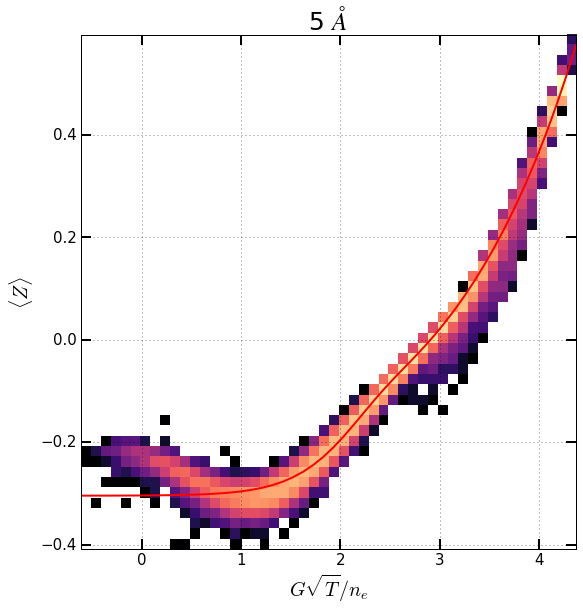

In [43]:
xsize = 8
ysize = 8.4

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.09
wpad = 0.13

xs_panel = 0.86 / nfigs_x 
ys_panel = 0.85 / nfigs_y 

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTnpar), cdist["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")
#ax.hist2d(np.log10(GTnpar), cdist["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTnpar)), np.log10(np.max(GTnpar)))
#NewPar  = function(GTn_arr, *popt_zmean)
#NewPar2  = function_new(GTn_arr, *popt_exp)
NewPar3  = function_schechter(GTn_arr, *popt_sch)


#NewPar = [0.05* np.min(GTnpar)**0.34 - 0.46, 0.05* np.max(GTnpar)**0.34 - 0.46]
#GTn_arr = np.logspace(np.min(GTnpar), np.max(GTnpar))
#NewPar  = popt_zmean[1]* GTn_arr**popt_zmean[0] + popt_zmean[2]
#DrainPar = GTn_arr* (np.max(cdist["zmean"]) - np.min(cdist["zmean"])) / (GTn_arr[-1] - GTn_arr[0]) 

#ax.plot(GTn_arr, NewPar, "-k", linewidth=2)
#ax.plot(GTn_arr, NewPar2, "-b", linewidth=2)
ax.plot(np.log10(GTn_arr), NewPar3, "-r", linewidth=2)
#ax.plot(np.log10(GTn_arr), DrainPar, "-b", linewidth=2)

#ax.scatter(GTnpar, cdist["zmean"])


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("$G\\sqrt{T} / n_{e}$", fontsize=20)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=20)

ax.grid("on")

if grain_size == 3.5:
    ax.set_title("%.1F $\\AA$"%grain_size, fontsize=25)
else:
    ax.set_title("%i $\\AA$"%grain_size, fontsize=25)
    
#ax.set_ylim(-6, 50.0)

#ax.set_xscale("log")
#ax.set_yscale("log")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/New_Parameters_%iAA_%s.pdf"%(grain_size, grain_type), format="pdf")

In [118]:
Zparam = function(GTnpar,  *popt_zmean)
Zparam_exp = function_new(GTnpar,  *popt_exp)
Zparam_sch = function_schechter(GTnpar,  *popt_sch)

In [119]:
rel_error     = abs(Zparam - cdist["zmean"])/abs(cdist["zmean"])
rel_error_exp = abs(Zparam_exp - cdist["zmean"])/abs(cdist["zmean"])
rel_error_sch = abs(Zparam_sch - cdist["zmean"])/abs(cdist["zmean"])

In [120]:
print(np.median(rel_error))
print(np.median(rel_error_exp))
print(np.median(rel_error_sch))

0.188502167942
0.363312127699
0.0412170852041


In [121]:
print(np.percentile(rel_error, [25, 50, 75]))
print(np.percentile(rel_error_exp, [25, 50, 75]))
print(np.percentile(rel_error_sch, [25, 50, 75]))

[ 0.07119976  0.18850217  0.25404285]
[ 0.18763281  0.36331213  0.68411464]
[ 0.01182695  0.04121709  0.1049728 ]


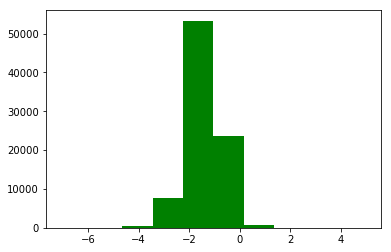

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111)

#ax.scatter(cdist["zmean"], Zparam)
#ax.hist(np.log10(rel_error))
#ax.hist(np.log10(rel_error_exp), color='red')
ax.hist(np.log10(rel_error_sch), color='green')

#ax.set_xscale("log")
#ax.set_yscale("log")

fig.show()

---

### Now for the size width

In [125]:
cdist_pos = cdist.copy()
cdist_neg = cdist.copy()

In [126]:
#cdist_pos = cdist.copy()
#cdist_neg = cdist.copy()

positive = np.where(cdist_pos["zmean"] >= 0.0)
negative = np.where(cdist_neg["zmean"] <  0.0)

ii = 0
for key in cdist.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax":
        #print(key)
        cdist_neg[key] = np.delete(cdist_neg[key], positive)
        cdist_pos[key] = np.delete(cdist_pos[key], negative)
        #ii +=1

In [127]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_sigma_pos(x, aa, bb, hh):

    #sigma_par = aa*(1. - np.exp(-np.abs(x[:])/hh)) + bb
    sigma_par = aa*(1. - np.exp(-x[:]/hh)) + bb
    
    return sigma_par

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_sigma_neg(x, aa, bb, hh):

    #sigma_par = aa*(1. - np.exp(-np.abs(x[:])/hh)) + bb
    sigma_par = aa*(1. - np.exp(x[:]/hh)) + bb
    
    return sigma_par

In [137]:
popt_zstd_pos[1]

0.32426433757442957

In [155]:
largeZ  = np.where(abs(cdist["zmean"]) > 0.01)
Zstd_smallGTn = np.delete(cdist["zstd"], largeZ)
Zstd_avg_GTnsmall = np.mean(Zstd_smallGTn)

In [156]:
print(Zstd_avg_GTnsmall)

0.31250662617


In [167]:
#popt_zstd_pos, pcov_zstd_pos = curve_fit(function_sigma_pos, cdist_pos["zmean"], cdist_pos["zstd"], p0=[0.3, 0.25, 0.8])
#popt_zstd_neg, pcov_zstd_neg = curve_fit(function_sigma_neg, cdist_neg["zmean"], cdist_neg["zstd"], bounds=([-np.inf, popt_zstd_pos[1]*0.999, -np.inf], [np.inf, popt_zstd_pos[1]*1.001, np.inf]), p0=[0.1, popt_zstd_pos[1], 1.0])

#popt_zstd_pos, pcov_zstd_pos = curve_fit(function_sigma_pos, cdist_pos["zmean"], cdist_pos["zstd"])
#popt_zstd_neg, pcov_zstd_neg = curve_fit(function_sigma_neg, cdist_neg["zmean"], cdist_neg["zstd"], bounds=([-np.inf, popt_zstd_pos[1]*0.999, -np.inf], [np.inf, popt_zstd_pos[1]*1.001, np.inf]),p0=[-1.0, popt_zstd_pos[1], 1.0])

popt_zstd_pos, pcov_zstd_pos = curve_fit(function_sigma_pos, cdist_pos["zmean"], cdist_pos["zstd"], p0=[0.3, Zstd_avg_GTnsmall, 0.3], bounds=([0.0, Zstd_avg_GTnsmall*0.999, 0.0], [0.5, Zstd_avg_GTnsmall*1.001, 0.50]))
popt_zstd_neg, pcov_zstd_neg = curve_fit(function_sigma_neg, cdist_neg["zmean"], cdist_neg["zstd"], bounds=([0.0, popt_zstd_pos[1]*0.999, 0.0], [10.0, popt_zstd_pos[1]*1.001, 1.0]),p0=[0.0, popt_zstd_pos[1], 0.5])

In [168]:
print(popt_zstd_pos)
print(popt_zstd_neg)

[ 0.36497086  0.31219412  0.48144953]
[ 0.48863462  0.31188193  1.        ]


In [169]:
#0.4246 & 0.2308 & 0.1669 & 8015.2912 & 5994.2053

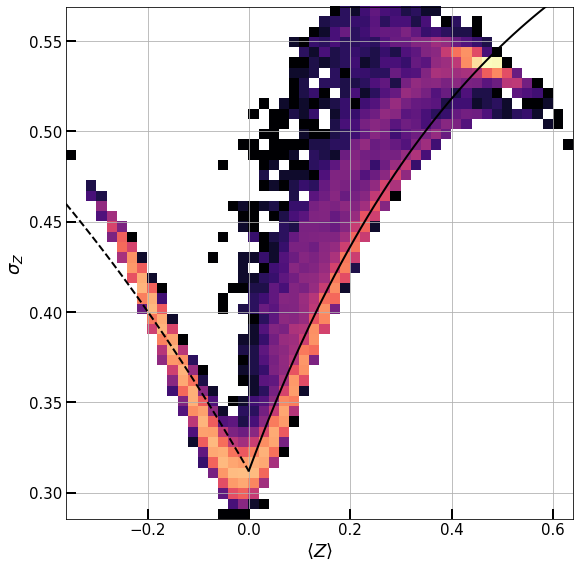

In [170]:
xsize = 8
ysize = 8

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.09
wpad = 0.11

xs_panel = 0.88 / nfigs_x 
ys_panel = 0.89 / nfigs_y 

############################################################################################################
############################               XX Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist["zmean"], cdist["zstd"], bins=50, norm=LogNorm(), normed=True, cmap="magma")


zmean_arr_pos = np.linspace(np.min(cdist_pos["zmean"]), np.max(cdist_pos["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, *popt_zstd_pos)
#NewPar        = function_sigma_pos(zmean_arr_pos,  0.33073526,  0.2401,  0.2995276641)
ax.plot(zmean_arr_pos, NewPar, "-k", linewidth=2)

zmean_arr_neg = np.linspace(np.min(cdist_neg["zmean"]), np.max(cdist_neg["zmean"]))
NewPar_neg        = function_sigma_neg(zmean_arr_neg, *popt_zstd_neg)
#NewPar_neg     = function_sigma_neg(zmean_arr_neg, 0.139583, 0.2401, 0.1803)
ax.plot(zmean_arr_neg, NewPar_neg, "--k", linewidth=2)


#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -0.1, 0.56, 1.0)
#ax.plot(zmean_arr_neg, NewPar_neg, "--k", linewidth=2)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=18)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=18)

ax.grid("on")

#ax.set_xlim(-0.25, 0.0)

fig.show()

#ax.set_xscale("log")

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Sigma_%iAA_%s.pdf"%(grain_size, grain_type), format="pdf")